**LINEAR ALGEBRA**

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='notebook', style='whitegrid', 
        palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc={'figure.figsize':(10,5)})
from scipy.spatial import distance
from sklearn.preprocessing import MaxAbsScaler

# Data Preprocessing

In [2]:
df = pd.read_csv('insurance_us.csv')

In [3]:
df.duplicated().sum()

153

We gonna leave these duplicates

In [4]:
df.isna().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Distribution of gender


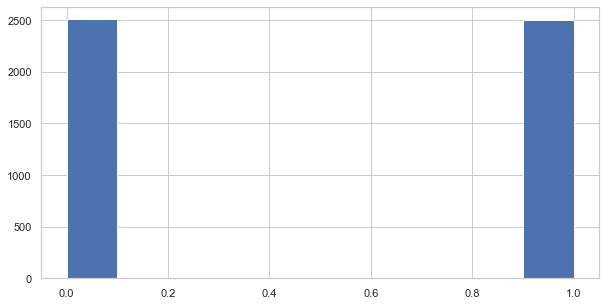

Distribution of age


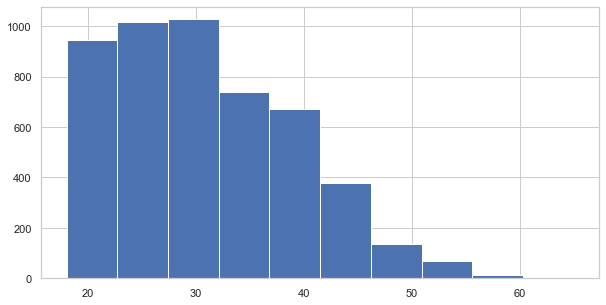

Distribution of salary


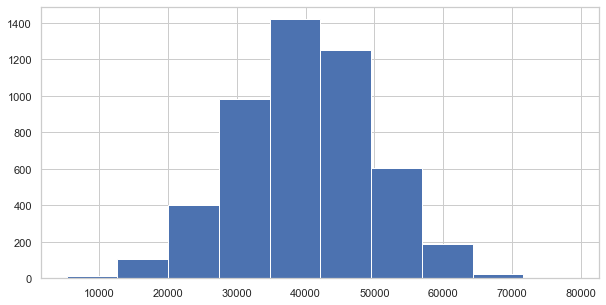

Distribution of family_members


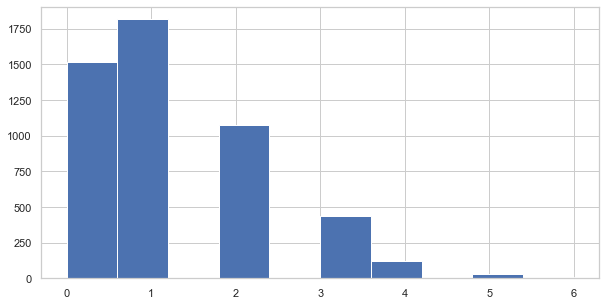

Distribution of insurance_benefits


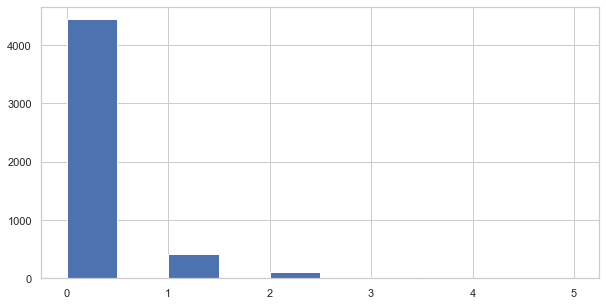

In [6]:
for col in df.columns:
    print(f'Distribution of {col}')
    df[col].hist()
    plt.show()

**Conclusion**

Data is fine

# Find customers who are similar to a given customer. This will help the company's agents with marketing.

Function that returns k nearest neighbors for an object based on a specified distance metric. The number of received insurance benefits is not be taken into account.

Scaling
- the data is not scaled
- the data is scaled with the MaxAbsScaler scaler

Distance Metrics
- Euclidean
- Manhattan


In [7]:
target = df['insurance_benefits'].apply(lambda x: 0 if x == 0 else 1)
features = df.drop('insurance_benefits', axis = 1)

In [8]:
scaler =  MaxAbsScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

In [9]:
def get_predicted_target(given_customer, target, features, number_neighbors = 10, distance_mesure = 'euclidean'):
    list_distances = []
    if distance == 'euclidean':
        for row in features.values:
            list_distances.append(distance.euclidean(row, given_customer))
    else:
        for row in features.values:
            list_distances.append(distance.cityblock(row, given_customer))
    nearest_index = np.array(list_distances).argsort()[1:(number_neighbors)]
    print(f'Insurance benefits of {number_neighbors} nearest neighbors')
    display(target[nearest_index]), round(target[nearest_index].mean(), 2)
    print(f'Average benefit of {number_neighbors} nearest neighbors = {round(target[nearest_index].mean(), 2)}')
    

In [10]:
given_customer = np.array(features.loc[25])

In [11]:
get_predicted_target(given_customer, target, features, distance_mesure = 'euclidean')

Insurance benefits of 10 nearest neighbors


375     1
1654    1
4581    0
706     0
318     0
2989    0
4863    0
4086    0
3399    0
Name: insurance_benefits, dtype: int64

Average benefit of 10 nearest neighbors = 0.22


In [12]:
get_predicted_target(given_customer, target, features_scaled, distance_mesure = 'euclidean')

Insurance benefits of 10 nearest neighbors


1342    1
2077    1
4809    0
66      1
249     0
2438    0
4542    1
4611    1
4557    0
Name: insurance_benefits, dtype: int64

Average benefit of 10 nearest neighbors = 0.56


In [13]:
get_predicted_target(given_customer, target, features, distance_mesure = 'cityblock')

Insurance benefits of 10 nearest neighbors


375     1
1654    1
4581    0
706     0
318     0
2989    0
4863    0
4086    0
3399    0
Name: insurance_benefits, dtype: int64

Average benefit of 10 nearest neighbors = 0.22


In [14]:
get_predicted_target(given_customer, target, features_scaled, distance_mesure = 'cityblock')

Insurance benefits of 10 nearest neighbors


1342    1
2077    1
4809    0
66      1
249     0
2438    0
4542    1
4611    1
4557    0
Name: insurance_benefits, dtype: int64

Average benefit of 10 nearest neighbors = 0.56


**Conclusion**
- scaling helps us to have the same feature weight and get more correct results
- in our case there is no difference between ciy blocks and Euclidean distances

# Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?

- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. 
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [15]:
from sklearn.neighbors import  KNeighborsClassifier

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [17]:
target_train, target_valid, features_train, features_valid = train_test_split(target, features, test_size = 0.3, random_state =13)

In [18]:
features_train_scaled = scaler.fit_transform(features_train)

In [19]:
features_valid_scaled = scaler.transform(features_valid)

In [20]:
def get_f_score(features_train, target_train, features_valid):
    for k in range(1, 11):
        for p in range(1, 3):
            print(f'Number of neighborhs = {k}')
            if p == 1:
                print('Cityblock distance')
            else:
                print('Euclidean distance')
            model =  KNeighborsClassifier(n_neighbors = k, p = p)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            print('F_score = ', round(f1_score(predicted_valid, target_valid), 3))
            print('*'*60)        
            
get_f_score(features_train, target_train, features_valid)

Number of neighborhs = 1
Cityblock distance
F_score =  0.656
************************************************************
Number of neighborhs = 1
Euclidean distance
F_score =  0.66
************************************************************
Number of neighborhs = 2
Cityblock distance
F_score =  0.391
************************************************************
Number of neighborhs = 2
Euclidean distance
F_score =  0.395
************************************************************
Number of neighborhs = 3
Cityblock distance
F_score =  0.425
************************************************************
Number of neighborhs = 3
Euclidean distance
F_score =  0.431
************************************************************
Number of neighborhs = 4
Cityblock distance
F_score =  0.158
************************************************************
Number of neighborhs = 4
Euclidean distance
F_score =  0.158
************************************************************
Number of neighborhs = 5


In [21]:
get_f_score(features_train_scaled, target_train, features_valid_scaled)

Number of neighborhs = 1
Cityblock distance
F_score =  0.936
************************************************************
Number of neighborhs = 1
Euclidean distance
F_score =  0.924
************************************************************
Number of neighborhs = 2
Cityblock distance
F_score =  0.901
************************************************************
Number of neighborhs = 2
Euclidean distance
F_score =  0.91
************************************************************
Number of neighborhs = 3
Cityblock distance
F_score =  0.938
************************************************************
Number of neighborhs = 3
Euclidean distance
F_score =  0.933
************************************************************
Number of neighborhs = 4
Cityblock distance
F_score =  0.906
************************************************************
Number of neighborhs = 4
Euclidean distance
F_score =  0.91
************************************************************
Number of neighborhs = 5
C

**Conclusion**
- scaled data gives a much better f-score
- the highest f-score when we are looking for only 1 neighbor
- city block and euclidean distances give more less the same results

In [22]:
class DummyModel:
    def __init__(self, probability):
        self.probability = probability

    def predict(self, X):
        return np.random.choice([0, 1], size=len(X), p=[1-self.probability, self.probability])


In [23]:
for p in [0, 0.5, 1]:
    print(f'Probability = {p}')
    model = DummyModel(probability=p)
    predictions = model.predict(target)
    print(f'F_score = {round(f1_score(target, predictions), 3)}')
    print('*'*60)

Probability = 0
F_score = 0.0
************************************************************
Probability = 0.5
F_score = 0.178
************************************************************
Probability = 1
F_score = 0.203
************************************************************


**Conclusion**

KNeighborsClassifier works better than dummy model for certain number of neighbors

# Predict the number of insurance benefits a new customer is likely to receive using a linear regression model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
model = LinearRegression()

In [26]:
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
round(mean_squared_error(predicted_valid, target_valid)**0.5, 3)

0.244

In [27]:
model.fit(features_train_scaled, target_train)
predicted_valid_scaled = model.predict(features_valid_scaled)
round(mean_squared_error(predicted_valid_scaled, target_valid)**0.5, 3)

0.244

**Conclusion**

For linear regression RMSE is the same for original data and scaled data